Two moving averages can be used together to generate crossover signals. In Technical Analysis this is the “double crossover method”. Double crossovers involve one relatively short moving average and one relatively long moving average. As with all moving averages, the general length of the moving average defines the timeframe for the system. A system using a 5-day SMA and 35-day SMA would be deemed short-term. A system using a 50-day SMA and 200-day SMA would be deemed medium-term, perhaps even long-term.

A bullish crossover occurs when the shorter moving average crosses above the longer moving average. This is also known as a golden cross.

A bearish crossover occurs when the shorter moving average crosses below the longer moving average. This is known as a dead cross.

In [100]:
#Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math
plt.style.use('fivethirtyeight')

In [83]:
#setting up dataframe
RIL = yf.Ticker('RELIANCE.NS')
RIL_df = RIL.history(start="2013-01-01",end="2018-12-31")
RIL_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-01-01,391.836552,393.043649,389.561693,390.304504,3152667,0.0,0.0
2013-01-02,391.836581,397.407721,391.163423,393.670410,6203434,0.0,0.0
2013-01-03,393.972151,400.193250,392.115095,399.612915,7968629,0.0,0.0
2013-01-04,400.146825,401.400319,396.270237,400.123627,6140890,0.0,0.0
2013-01-07,401.911075,404.371637,395.457817,397.686279,7064261,0.0,0.0
...,...,...,...,...,...,...,...
2018-12-21,1104.152823,1110.286978,1075.690247,1079.812378,8360445,0.0,0.0
2018-12-24,1080.499407,1082.756826,1066.415367,1068.967163,4183821,0.0,0.0
2018-12-26,1065.679171,1079.616021,1045.902545,1077.996582,7278403,0.0,0.0


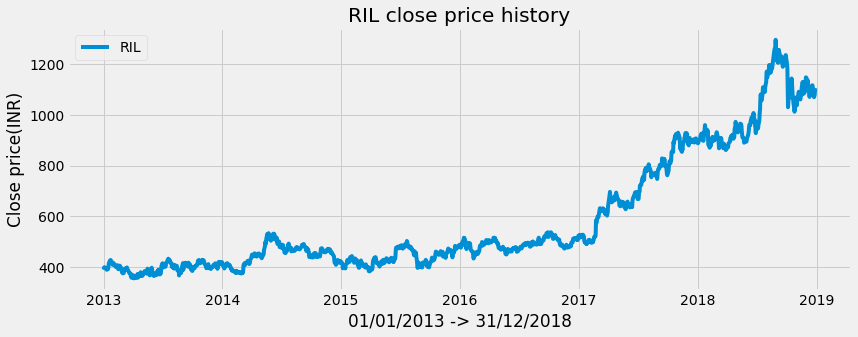

In [96]:
#visualisation
plt.figure(figsize=(12.5, 4.5))
plt.plot(RIL_df['Close'], label = 'RIL')
plt.title('RIL close price history')
plt.xlabel('01/01/2013 -> 31/12/2018')
plt.ylabel('Close price(INR)')
plt.legend(loc = 'upper left')
plt.show()

In [85]:
#SMA with 30 days window
SMA30 = pd.DataFrame()
SMA30['Close Price'] = RIL_df['Close'].rolling(window=30).mean()
SMA30

,Close Price
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-07,NaN
...,...
2018-12-21,1102.371431
2018-12-24,1102.230758
2018-12-26,1102.831087


In [86]:
#SMA with 100 day window
SMA100=pd.DataFrame()
SMA100['Close Price'] = RIL_df['Close'].rolling(window=100).mean()
SMA100

,Close Price
Date,
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,NaN
2013-01-04,NaN
2013-01-07,NaN
...,...
2018-12-21,1139.397376
2018-12-24,1139.142194
2018-12-26,1139.021473


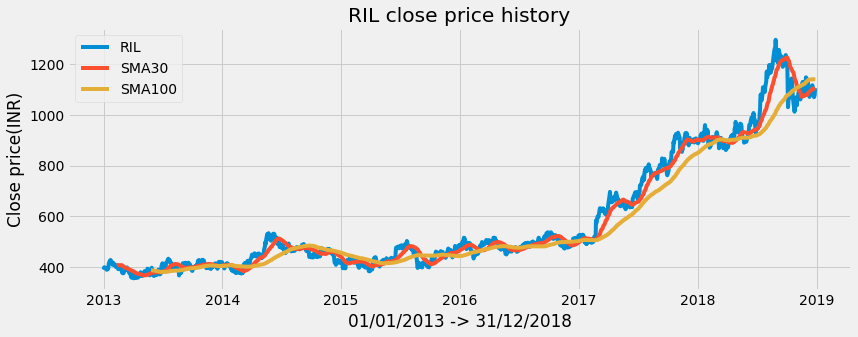

In [97]:
#visualisation
plt.figure(figsize=(12.5, 4.5))
plt.plot(RIL_df['Close'], label = 'RIL')
plt.plot(SMA30['Close Price'], label = 'SMA30')
plt.plot(SMA100['Close Price'], label = 'SMA100')
plt.title('RIL close price history')
plt.xlabel('01/01/2013 -> 31/12/2018')
plt.ylabel('Close price(INR)')
plt.legend(loc = 'upper left')
plt.show()

In [88]:
#creating new dataframe to store data
data_IND = pd.DataFrame()
data_IND['RIL'] = RIL_df['Close']
data_IND['SMA30'] = SMA30['Close Price']
data_IND['SMA100'] = SMA100['Close Price']
data_IND

,RIL,SMA30,SMA100
Date,,,
2013-01-01,390.304504,NaN,NaN
2013-01-02,393.670410,NaN,NaN
2013-01-03,399.612915,NaN,NaN
2013-01-04,400.123627,NaN,NaN
2013-01-07,397.686279,NaN,NaN
...,...,...,...
2018-12-21,1079.812378,1102.371431,1139.397376
2018-12-24,1068.967163,1102.230758,1139.142194
2018-12-26,1077.996582,1102.831087,1139.021473


In [89]:
#Strategy function for signalling
def strategy(data):
    signal_price_buy = []
    signal_price_sell = []
    flag = -1
    net_pnl = [0]
    
    for i in range(len(data)):
        if data['SMA30'][i] > data['SMA100'][i]:
            if flag != 1:
                signal_price_buy.append(data['RIL'][i])
                signal_price_sell.append(np.nan)
                flag = 1
            else:
                signal_price_buy.append(np.nan)
                signal_price_sell.append(np.nan)
        elif data['SMA30'][i] < data['SMA100'][i]:
            if flag != 0:
                signal_price_buy.append(np.nan)
                signal_price_sell.append(data['RIL'][i])
                flag = 0
            else:
                signal_price_buy.append(np.nan)
                signal_price_sell.append(np.nan)
        else:
            signal_price_buy.append(np.nan)
            signal_price_sell.append(np.nan)
    return (signal_price_buy, signal_price_sell, net_pnl)

In [90]:
#store buy and sell data in a variable
buy_sell = strategy(data_IND)
data_IND['Buy_Signal_Price'] = buy_sell[0]
data_IND['Sell_Signal_Price'] = buy_sell[1]


In [91]:
#show the data
data_IND

,RIL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,
2013-01-01,390.304504,NaN,NaN,NaN,NaN
2013-01-02,393.670410,NaN,NaN,NaN,NaN
2013-01-03,399.612915,NaN,NaN,NaN,NaN
2013-01-04,400.123627,NaN,NaN,NaN,NaN
2013-01-07,397.686279,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-12-21,1079.812378,1102.371431,1139.397376,NaN,NaN
2018-12-24,1068.967163,1102.230758,1139.142194,NaN,NaN
2018-12-26,1077.996582,1102.831087,1139.021473,NaN,NaN


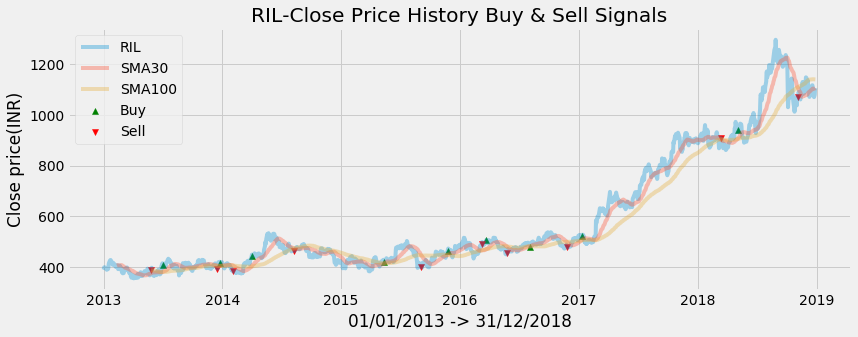

In [98]:
#visualise data and strategy
plt.figure(figsize = (12.5, 4.5))
plt.plot(data_IND['RIL'], label = 'RIL', alpha = 0.35)
plt.plot(data_IND['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data_IND['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data_IND.index, data_IND['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data_IND.index, data_IND['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('RIL-Close Price History Buy & Sell Signals')
plt.xlabel('01/01/2013 -> 31/12/2018')
plt.ylabel('Close price(INR)')
plt.legend(loc = 'upper left')
plt.show()

4600.869415283203 INR is the spent amount.
5437.749938964844 INR is the gained amount.
836.8805236816406 INR is the net PnL.
Congratulations! NET PROFIT


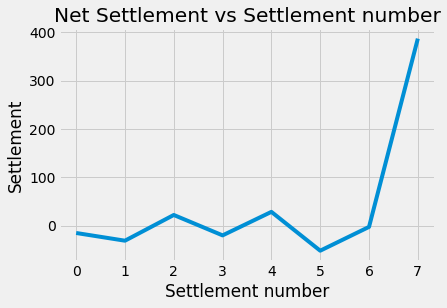

In [103]:
#Calculating PnL
Buy=data_IND['Buy_Signal_Price'].sum()
Sell=data_IND['Sell_Signal_Price'].sum()
pnl=Sell-Buy
print(str(Buy) + " INR is the spent amount.")
print(str(Sell) + " INR is the gained amount.")
print(str(pnl) + " INR is the net PnL.")
if pnl >= 0:
    print('Congratulations! NET PROFIT')
else:
    print('Oops! NET LOSS')
Buy_list = []
Sell_list = []
pnl_list = []
for i in data_IND['Buy_Signal_Price']:
        Buy_list.append(i)
for j in data_IND['Sell_Signal_Price']:
        Sell_list.append(j)
cleanedList_buy = [x for x in Buy_list if (math.isnan(x) == False)]
cleanedList_sell = [x for x in Sell_list if (math.isnan(x) == False)]
cleanedList_sell.pop(0)        #we have to buy a stock first 
for i in range(0,len(cleanedList_buy)-1):
    pnl_list.append(cleanedList_sell[i]-cleanedList_buy[i])
plt.plot(pnl_list)
plt.title('Net Settlement vs Settlement number')
plt.xlabel('Settlement number')  #First settlement number corresponds to first settlement
plt.ylabel('Settlement')
plt.show()